In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

NOTE:
When you Run All Cell,
1. You will have to be recorded for your right hand landmark first then press q to stop and it will give an output of 21 if correct (must show upperbody aswell). 
2. After this, MAKE SURE YOU HAVE THE MD_Data folder in your directory (If not, just run the In[20] cell code and it will generate the folder)
3. You must waint a bit then you will be recorded for te 30/per each gesture nad done save the datas into the MD_Data folder


In [49]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [50]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [51]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    return image, results

In [52]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections (CORRECTION FROM FACE_CONNECTION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [53]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [54]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        # Read Feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
    
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [55]:
draw_landmarks(frame, results)

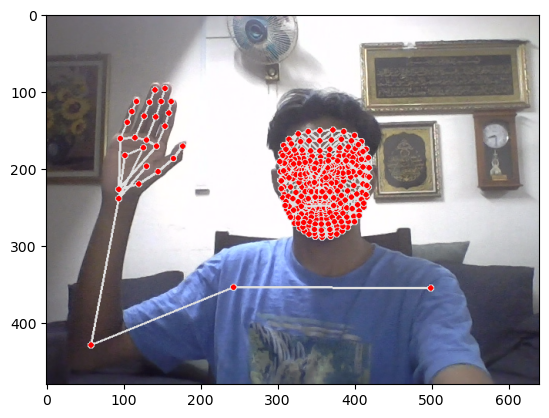

In [56]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [57]:
len(results.right_hand_landmarks.landmark) #You need to show your whole upper body and arms for this line of code to work

21

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [59]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [60]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [61]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [62]:

result_test = extract_keypoints(results)

In [63]:
result_test

array([ 0.54405296,  0.45475629, -0.71290737, ...,  0.18305677,
        0.23618834, -0.03683755])

In [64]:
np.save('0', result_test)

In [65]:
np.load('0.npy')

array([ 0.54405296,  0.45475629, -0.71290737, ...,  0.18305677,
        0.23618834, -0.03683755])

In [238]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'sayasukaawak', 'terimakasih'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
#start_folder = 30

In [239]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    #str(dirmax+sequence)
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

NOTE:
- IF YOU WANTED MORE ACCURATE MODEL, YOU CAN INCREASE THE NUMBER OF SEQUENCE/RECORDINGS & SEQUENCE LENGHT TO MORE THAN 30 IF NECESSARY (NOT NEED TO MAKE SURE ALL THE CODES ABOVE FOLLOW UP UPON THE CHANGES)

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        #(start_folder, start_folder+no_sequences)
        for sequence in range(1, no_sequences+1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

In [240]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [241]:
label_map = {label:num for num, label in enumerate (actions)}

In [242]:
label_map

{'hello': 0, 'sayasukaawak': 1, 'terimakasih': 2}

In [71]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [72]:
np.array(sequences).shape

(90, 30, 1662)

In [73]:
np.array(labels).shape

(90,)

In [74]:
X = np.array(sequences)

In [75]:
X.shape

(90, 30, 1662)

In [76]:
y = to_categorical(labels).astype(int)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [78]:
y_test.shape

(5, 3)

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [216]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [217]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [218]:
res = [0.7, 0.2, 0.1]

In [219]:
actions[np.argmax(res)]

'hello'

In [220]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [221]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 86ms/step - loss: 1.6682 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.2932 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 0s 81ms/step - loss: 4.5674 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 82ms/step - loss: 4.0688 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.1899 - categorical_accuracy: 0.3059
Epoch 6/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.6486 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0188 - categorical_accuracy: 0.4353
Epoch 8/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.7919 - categorical_accuracy: 0.5412
Epoch 9/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.7242 - categorical_accuracy: 0.6118
E

3/3 [==============================] - 0s 81ms/step - loss: 0.0906 - categorical_accuracy: 0.9647
Epoch 75/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0911 - categorical_accuracy: 0.9647
Epoch 76/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.0757 - categorical_accuracy: 0.9647
Epoch 77/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0548 - categorical_accuracy: 0.9765
Epoch 78/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0698 - categorical_accuracy: 0.9882
Epoch 79/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0513 - categorical_accuracy: 0.9765
Epoch 80/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0655 - categorical_accuracy: 0.9882
Epoch 81/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0527 - categorical_accuracy: 0.9765
Epoch 82/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0706 - categorical_accuracy: 0.9647
Epoch 

3/3 [==============================] - 0s 76ms/step - loss: 0.1990 - categorical_accuracy: 0.9059
Epoch 147/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1848 - categorical_accuracy: 0.9176
Epoch 148/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1411 - categorical_accuracy: 0.9412
Epoch 149/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1117 - categorical_accuracy: 0.9647
Epoch 150/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1045 - categorical_accuracy: 0.9529
Epoch 151/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0748 - categorical_accuracy: 0.9647
Epoch 152/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0778 - categorical_accuracy: 0.9647
Epoch 153/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0778 - categorical_accuracy: 0.9647
Epoch 154/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0668 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 80ms/step - loss: 0.0494 - categorical_accuracy: 0.9882
Epoch 219/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0483 - categorical_accuracy: 0.9765
Epoch 220/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0422 - categorical_accuracy: 0.9765
Epoch 221/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0381 - categorical_accuracy: 0.9882
Epoch 222/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0460 - categorical_accuracy: 0.9882
Epoch 223/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0349 - categorical_accuracy: 0.9882
Epoch 224/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0328 - categorical_accuracy: 0.9882
Epoch 225/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0282 - categorical_accuracy: 0.9882
Epoch 226/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0258 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 75ms/step - loss: 0.2816 - categorical_accuracy: 0.9529
Epoch 291/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1764 - categorical_accuracy: 0.9412
Epoch 292/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1643 - categorical_accuracy: 0.9529
Epoch 293/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1939 - categorical_accuracy: 0.9294
Epoch 294/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1547 - categorical_accuracy: 0.9529
Epoch 295/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1440 - categorical_accuracy: 0.9529
Epoch 296/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1109 - categorical_accuracy: 0.9765
Epoch 297/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1292 - categorical_accuracy: 0.9765
Epoch 298/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1021 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 79ms/step - loss: 0.0129 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0254 - categorical_accuracy: 0.9882
Epoch 364/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 367/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0144 - categorical_accuracy: 0.9882
Epoch 368/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 369/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 370/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0028 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 81ms/step - loss: 1.5352e-04 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.5072e-04 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4794e-04 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.4551e-04 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4281e-04 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.4032e-04 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3805e-04 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3581e-04 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.33

3/3 [==============================] - 0s 81ms/step - loss: 6.4001e-05 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.3406e-05 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.2834e-05 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.2319e-05 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 79ms/step - loss: 6.1647e-05 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.1071e-05 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.0579e-05 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.0004e-05 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.94

3/3 [==============================] - 0s 82ms/step - loss: 3.6308e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.6025e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.5773e-05 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.5554e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.5323e-05 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.4979e-05 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.4825e-05 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.4553e-05 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.43

3/3 [==============================] - 0s 82ms/step - loss: 2.2685e-05 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.2571e-05 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.2415e-05 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.2292e-05 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.2139e-05 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.2005e-05 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.1857e-05 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.1731e-05 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.15

3/3 [==============================] - 0s 81ms/step - loss: 1.4937e-05 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4857e-05 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.4762e-05 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.4675e-05 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4593e-05 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.4513e-05 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4442e-05 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.4356e-05 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.42

3/3 [==============================] - 0s 81ms/step - loss: 1.0204e-05 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0156e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0107e-05 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0043e-05 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0001e-05 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.9516e-06 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.8969e-06 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 76ms/step - loss: 9.8450e-06 - categorical_accuracy: 1.0000
Epoch 790/2000
3/3 [==============================] - 0s 79ms/step - loss: 9.79

3/3 [==============================] - 0s 82ms/step - loss: 7.2155e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.1847e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 76ms/step - loss: 7.1496e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 79ms/step - loss: 7.1230e-06 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.0893e-06 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 75ms/step - loss: 7.0528e-06 - categorical_accuracy: 1.0000
Epoch 858/2000
3/3 [==============================] - 0s 83ms/step - loss: 7.0192e-06 - categorical_accuracy: 1.0000
Epoch 859/2000
3/3 [==============================] - 0s 79ms/step - loss: 6.9883e-06 - categorical_accuracy: 1.0000
Epoch 860/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.95

3/3 [==============================] - 0s 81ms/step - loss: 5.2760e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.2620e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.2339e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 79ms/step - loss: 5.2115e-06 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 76ms/step - loss: 5.1975e-06 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.1680e-06 - categorical_accuracy: 1.0000
Epoch 928/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.1470e-06 - categorical_accuracy: 1.0000
Epoch 929/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.1245e-06 - categorical_accuracy: 1.0000
Epoch 930/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.09

3/3 [==============================] - 0s 76ms/step - loss: 3.9942e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.9815e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.9619e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.9535e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.9339e-06 - categorical_accuracy: 1.0000
Epoch 997/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.9198e-06 - categorical_accuracy: 1.0000
Epoch 998/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.9058e-06 - categorical_accuracy: 1.0000
Epoch 999/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.8918e-06 - categorical_accuracy: 1.0000
Epoch 1000/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.8

3/3 [==============================] - 0s 82ms/step - loss: 3.1261e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.1176e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.1050e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.0952e-06 - categorical_accuracy: 1.0000
Epoch 1065/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.0826e-06 - categorical_accuracy: 1.0000
Epoch 1066/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.0742e-06 - categorical_accuracy: 1.0000
Epoch 1067/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.0700e-06 - categorical_accuracy: 1.0000
Epoch 1068/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.0517e-06 - categorical_accuracy: 1.0000
Epoch 1069/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 2.4950e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.4880e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.4823e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4767e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4697e-06 - categorical_accuracy: 1.0000
Epoch 1135/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.4599e-06 - categorical_accuracy: 1.0000
Epoch 1136/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4571e-06 - categorical_accuracy: 1.0000
Epoch 1137/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4487e-06 - categorical_accuracy: 1.0000
Epoch 1138/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 2.0322e-06 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.0251e-06 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.0167e-06 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.0139e-06 - categorical_accuracy: 1.0000
Epoch 1203/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.0069e-06 - categorical_accuracy: 1.0000
Epoch 1204/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.0027e-06 - categorical_accuracy: 1.0000
Epoch 1205/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.9971e-06 - categorical_accuracy: 1.0000
Epoch 1206/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.9915e-06 - categorical_accuracy: 1.0000
Epoch 1207/2000
3/3 [==============================] - 0s 80ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 1.6577e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.6493e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.6465e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.6437e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.6423e-06 - categorical_accuracy: 1.0000
Epoch 1273/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.6367e-06 - categorical_accuracy: 1.0000
Epoch 1274/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.6297e-06 - categorical_accuracy: 1.0000
Epoch 1275/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.6254e-06 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 79ms/step - loss: 1.3772e-06 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3758e-06 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3702e-06 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3660e-06 - categorical_accuracy: 1.0000
Epoch 1341/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3618e-06 - categorical_accuracy: 1.0000
Epoch 1342/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3562e-06 - categorical_accuracy: 1.0000
Epoch 1343/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.3548e-06 - categorical_accuracy: 1.0000
Epoch 1344/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.3492e-06 - categorical_accuracy: 1.0000
Epoch 1345/2000
3/3 [==============================] - 0s 80ms/step - lo

3/3 [==============================] - 0s 80ms/step - loss: 1.1486e-06 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1430e-06 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1388e-06 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1346e-06 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.1332e-06 - categorical_accuracy: 1.0000
Epoch 1411/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1304e-06 - categorical_accuracy: 1.0000
Epoch 1412/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1304e-06 - categorical_accuracy: 1.0000
Epoch 1413/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1276e-06 - categorical_accuracy: 1.0000
Epoch 1414/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 9.6910e-07 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 80ms/step - loss: 9.6489e-07 - categorical_accuracy: 1.0000
Epoch 1477/2000
3/3 [==============================] - 0s 79ms/step - loss: 9.6349e-07 - categorical_accuracy: 1.0000
Epoch 1478/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.5928e-07 - categorical_accuracy: 1.0000
Epoch 1479/2000
3/3 [==============================] - 0s 76ms/step - loss: 9.5507e-07 - categorical_accuracy: 1.0000
Epoch 1480/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.5507e-07 - categorical_accuracy: 1.0000
Epoch 1481/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.5227e-07 - categorical_accuracy: 1.0000
Epoch 1482/2000
3/3 [==============================] - 0s 81ms/step - loss: 9.4946e-07 - categorical_accuracy: 1.0000
Epoch 1483/2000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 8.1763e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 80ms/step - loss: 8.1904e-07 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 81ms/step - loss: 8.1343e-07 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.1343e-07 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 80ms/step - loss: 8.1202e-07 - categorical_accuracy: 1.0000
Epoch 1549/2000
3/3 [==============================] - 0s 80ms/step - loss: 8.0922e-07 - categorical_accuracy: 1.0000
Epoch 1550/2000
3/3 [==============================] - 0s 81ms/step - loss: 8.0641e-07 - categorical_accuracy: 1.0000
Epoch 1551/2000
3/3 [==============================] - 0s 80ms/step - loss: 8.0501e-07 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 6.9422e-07 - categorical_accuracy: 1.0000
Epoch 1614/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.9141e-07 - categorical_accuracy: 1.0000
Epoch 1615/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.8861e-07 - categorical_accuracy: 1.0000
Epoch 1616/2000
3/3 [==============================] - 0s 82ms/step - loss: 6.8861e-07 - categorical_accuracy: 1.0000
Epoch 1617/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.8580e-07 - categorical_accuracy: 1.0000
Epoch 1618/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.8160e-07 - categorical_accuracy: 1.0000
Epoch 1619/2000
3/3 [==============================] - 0s 82ms/step - loss: 6.8019e-07 - categorical_accuracy: 1.0000
Epoch 1620/2000
3/3 [==============================] - 0s 76ms/step - loss: 6.8160e-07 - categorical_accuracy: 1.0000
Epoch 1621/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 90ms/step - loss: 5.9044e-07 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.9044e-07 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.8763e-07 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.8623e-07 - categorical_accuracy: 1.0000
Epoch 1686/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.8483e-07 - categorical_accuracy: 1.0000
Epoch 1687/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.8483e-07 - categorical_accuracy: 1.0000
Epoch 1688/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.8342e-07 - categorical_accuracy: 1.0000
Epoch 1689/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.8342e-07 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 5.1050e-07 - categorical_accuracy: 1.0000
Epoch 1752/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.1050e-07 - categorical_accuracy: 1.0000
Epoch 1753/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.0769e-07 - categorical_accuracy: 1.0000
Epoch 1754/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.0769e-07 - categorical_accuracy: 1.0000
Epoch 1755/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.0629e-07 - categorical_accuracy: 1.0000
Epoch 1756/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.0489e-07 - categorical_accuracy: 1.0000
Epoch 1757/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.0348e-07 - categorical_accuracy: 1.0000
Epoch 1758/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.0068e-07 - categorical_accuracy: 1.0000
Epoch 1759/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 79ms/step - loss: 4.3336e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.3196e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.3056e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.2775e-07 - categorical_accuracy: 1.0000
Epoch 1824/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.2495e-07 - categorical_accuracy: 1.0000
Epoch 1825/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.2495e-07 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.2635e-07 - categorical_accuracy: 1.0000
Epoch 1827/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.2495e-07 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 79ms/step - loss: 3.7446e-07 - categorical_accuracy: 1.0000
Epoch 1890/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.7446e-07 - categorical_accuracy: 1.0000
Epoch 1891/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.7446e-07 - categorical_accuracy: 1.0000
Epoch 1892/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.7025e-07 - categorical_accuracy: 1.0000
Epoch 1893/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.7025e-07 - categorical_accuracy: 1.0000
Epoch 1894/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.7305e-07 - categorical_accuracy: 1.0000
Epoch 1895/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.7165e-07 - categorical_accuracy: 1.0000
Epoch 1896/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.7165e-07 - categorical_accuracy: 1.0000
Epoch 1897/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.2116e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.2116e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.2116e-07 - categorical_accuracy: 1.0000
Epoch 1962/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.1976e-07 - categorical_accuracy: 1.0000
Epoch 1963/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.1976e-07 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.1836e-07 - categorical_accuracy: 1.0000
Epoch 1965/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.1555e-07 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 80ms/step - lo

In [222]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_19 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [223]:
model.predict(X_test)

array([[2.8656513e-37, 1.0000000e+00, 1.8069157e-30],
       [4.3382631e-10, 6.2212575e-07, 9.9999940e-01],
       [5.6966085e-09, 9.9940109e-01, 5.9886504e-04],
       [5.2527382e-16, 9.9999762e-01, 2.4000890e-06],
       [1.0000000e+00, 4.6794799e-21, 0.0000000e+00]], dtype=float32)

In [224]:
res = model.predict(X_test)

In [225]:
actions[np.argmax(res[4])]

'hello'

In [226]:
actions[np.argmax(y_test[4])]

'hello'

In [227]:
model.save('action.h5')

NOTE:
- WHEN RESTARTING ALL, MAKE SURE TO NOT RUN THIS DEL MODEL!
- WHEN YOU WANT REDO THE MODEL

In [214]:
del model

In [228]:
model.load_weights('action.h5')

In [229]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [230]:
yhat = model.predict(X_train)

In [231]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [232]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 0, 28]]], dtype=int64)

In [233]:
accuracy_score(ytrue,yhat)

1.0

NOTE IMPORTANT:
- MAKE SURE WHEN WE TRAIN THE MODELS, MAKE SURE TO SHOW WHOLE UPPER BODY THROUGHOUT THE FRAMES/SEQUENCE RECORDING OTHERWISE THE DATA WOULD NOT BE CONSISTENT 
note on:
In[21]

In [234]:
from scipy import stats

In [235]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    if isinstance(res, np.ndarray):  # Check if res is an array
        for num, prob in enumerate(res):
            if num < len(colors):  # Check if num is within the range of colors list
                prob_value = prob  # Assuming prob is an array
                cv2.rectangle(output_frame, (0, 60+num*40), (int(prob_value*100), 90+num*40), colors[num], -1)
                cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    else:  # If res is a scalar variable
        prob_value = res
        cv2.rectangle(output_frame, (0, 60), (int(prob_value*100), 90), colors[0], -1)  # Assuming colors is a list with one color
        cv2.putText(output_frame, actions[0], (0, 85), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)  # Assuming actions is a list with one action
    return output_frame




In [236]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [243]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'me

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.py

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solu

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.pytho

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.

terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.pyth

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.p

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.p

terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.pyth

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediap

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionO

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.so

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.py

terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
terimakasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'med

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'

sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sayasukaawak
<class 

In [140]:
np.expand_dims(X_test[0], axis=0)

array([[[ 5.92547417e-01,  3.60418111e-01, -4.11971807e-01, ...,
          4.98568356e-01,  4.92903113e-01, -5.13489172e-02],
        [ 6.16728723e-01,  3.48591328e-01, -7.02368796e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.23082638e-01,  3.44590306e-01, -6.32555962e-01, ...,
          4.54669952e-01,  1.07812107e+00, -3.23575980e-04],
        ...,
        [ 6.08692646e-01,  3.36976856e-01, -5.04560411e-01, ...,
          5.27449250e-01,  5.35723388e-01, -6.43738657e-02],
        [ 6.08823836e-01,  3.37400168e-01, -5.12034059e-01, ...,
          5.27528703e-01,  5.34781933e-01, -6.42629489e-02],
        [ 6.08832896e-01,  3.37616414e-01, -5.19672096e-01, ...,
          5.26633739e-01,  5.43904781e-01, -6.23056367e-02]]])

In [141]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.7134421e-15, 1.1896713e-02, 9.8810333e-01]], dtype=float32)

In [142]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1